In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:
from pylab import rcParams

from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [5]:
os.chdir("C:/Users/Rubén/Documents/DATA ANALIST/git/TareasEBACmx/Practica M46")
df_apple = pd.read_csv("Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv",index_col='Date',parse_dates=['Date'])
df_google = pd.read_csv("Analista de datos GOOGL_2006-01-01_to_2018-01-01_M31.csv",index_col='Date',parse_dates=['Date'])

## Autocorrelacion

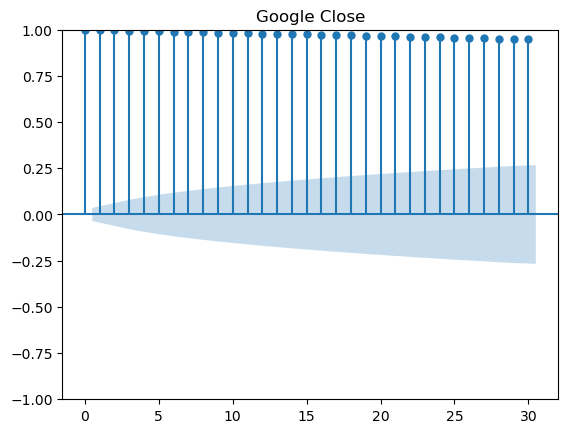

In [6]:
plot_acf(df_google["Close"], lags=30, title="Google Close")
plt.show()

## Autocorrelacion Parcial

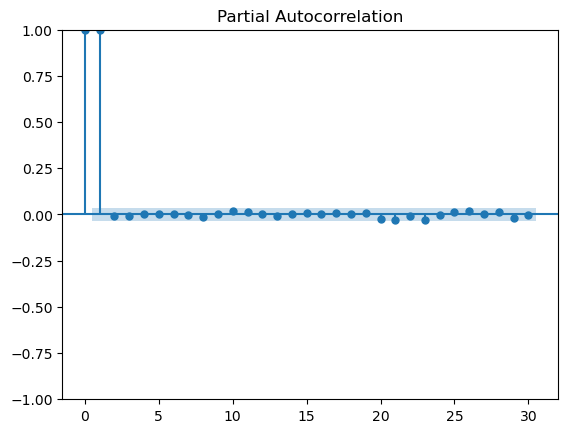

In [7]:
plot_pacf(df_google["Close"], lags=30)
plt.show()

In [10]:
from scipy.stats import norm
import pandas as pd

# Parámetros del proceso
delta = 0.25
dt = 0.1
# Punto inicio
x = 0.0
xini = 0
# Número de Iteraciones
n = 10

# Genera los distintos puntos de la serie
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)
    

-0.001099436494429612
-0.004406257004215158
0.003431952940300749
0.009131920587730023
0.0005582117241416506
0.006758393426490833
0.009823566624795384
0.008586161373203118
0.009110891446105416
0.00988095399953431


In [12]:
# Número de trayectorias 
ntra = 10
# Número de Iteraciones 
n = 20

# Se pueden guardar los caminos diferentes en un dataframe
res = []
dfres = pd.DataFrame().assign(traj=0, nsample=0, sample=0)

In [13]:
dfres

,traj,nsample,sample


In [21]:
# Genera las trayectorias en un dataframe (dfres)
# Nota: `res` fue inicializado como lista; no se puede usar pd.concat sobre una lista.
# Aquí agregamos los valores a la lista y seguimos concatenando filas a dfres.
for i in range(ntra):
    x = 0.0  # Reiniciar x para cada trayectoria
    for k in range(1, n+1):
        x = x + norm.rvs(scale=delta**2*dt)
        # Añadir el valor a la lista `res`
        res.append(x)
        # Añadir la fila al dataframe dfres
        df2 = {'traj': i, 'nsample': k, 'sample': x}
        dfres = pd.concat([dfres, pd.DataFrame(df2, index=[0])], ignore_index=True)

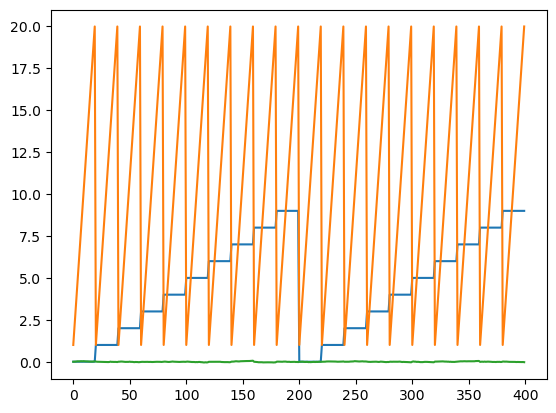

In [23]:
plt.plot(dfres)
plt.show()

## Reversion a la Media

In [18]:
def mod_vasicek(r0, K, theta, sigma, T=1., N=10, seed=777):
    np.random.seed(seed)
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        dr = K*(theta-rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

In [19]:
r0 = 0.1875
K = 0.2
theta = 0.04
sigma = 0.012
T = 10
seed = np.random.randint(100, 900)
N = 1000
# Llama a la función Vasicek
x, y = mod_vasicek(r0, K, theta, sigma, T, N, seed)

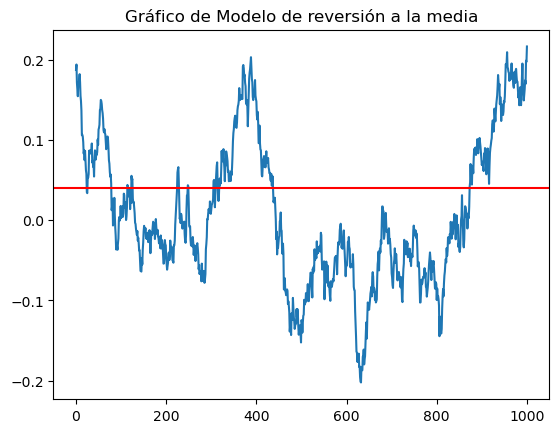

In [20]:
plt.plot(x,y)
plt.title('Gráfico de Modelo de reversión a la media')
plt.axhline(theta, color="red")
plt.show()